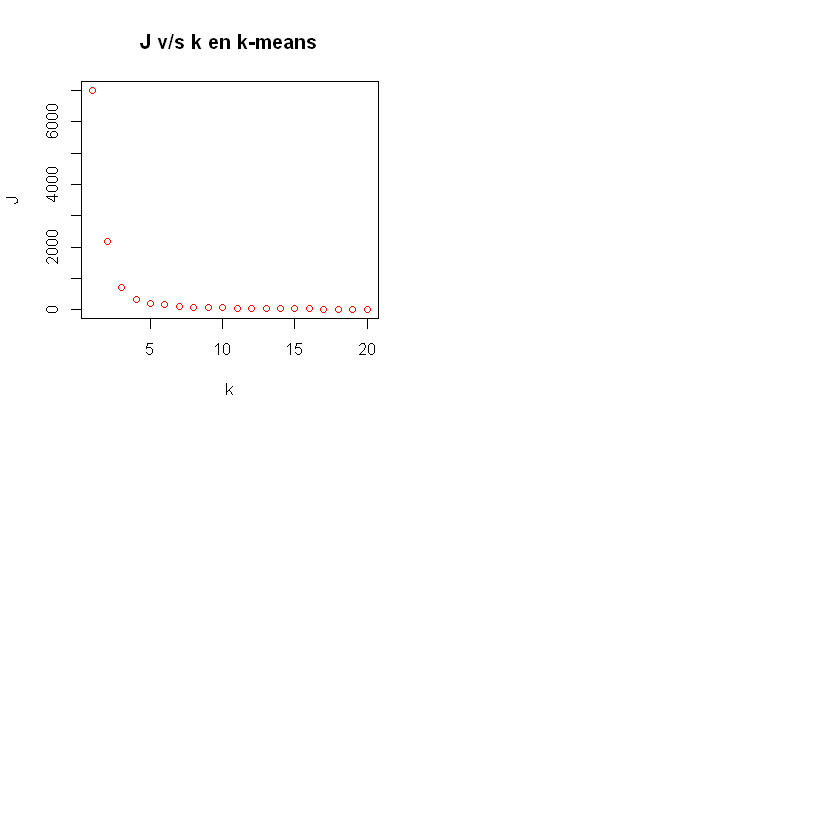

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1,-3.831081,-2.2408320,0.09790001,-0.02910750,-0.029457957
2,-1.748439,0.5834780,-0.20968076,0.06088255,-0.002705362
3,1.243827,0.0248324,0.07949783,-0.02299768,0.004865841


K-means clustering with 3 clusters of sizes 2, 7, 16

Cluster means:
        V2        V3       V4       V5       V6
1 45.65000 10.150000 38.45000 0.450000 0.690000
2 69.47143  9.514286 16.28571 2.928571 1.432857
3 86.06250  4.275000  4.17500 5.118750 0.635625

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         3          3          3          3          3          3          3 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         3          3          3          3          3          3          3 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         3          3          2          2          2          2          2 
  REINDEER      WHALE       SEAL    DOLPHIN 
         2          2          1          1 

Within cluster sum of squares by cluster:
[1]  27.1912 299.9911 377.2215
 (between_SS / total_SS =  89.9 %)

Available components:

[1] "cluster"      "centers"

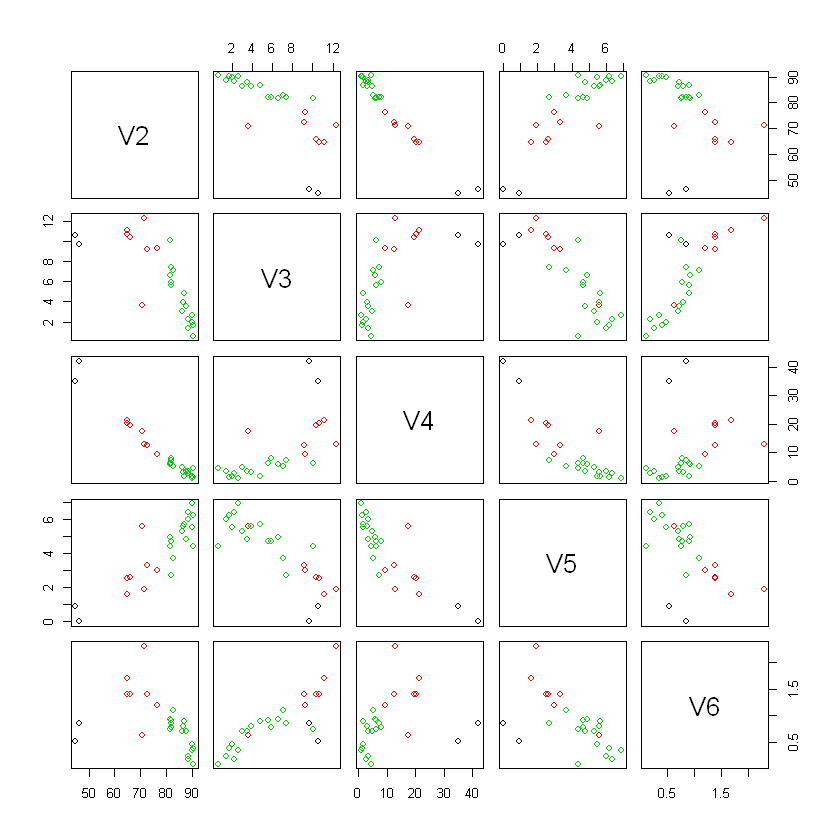

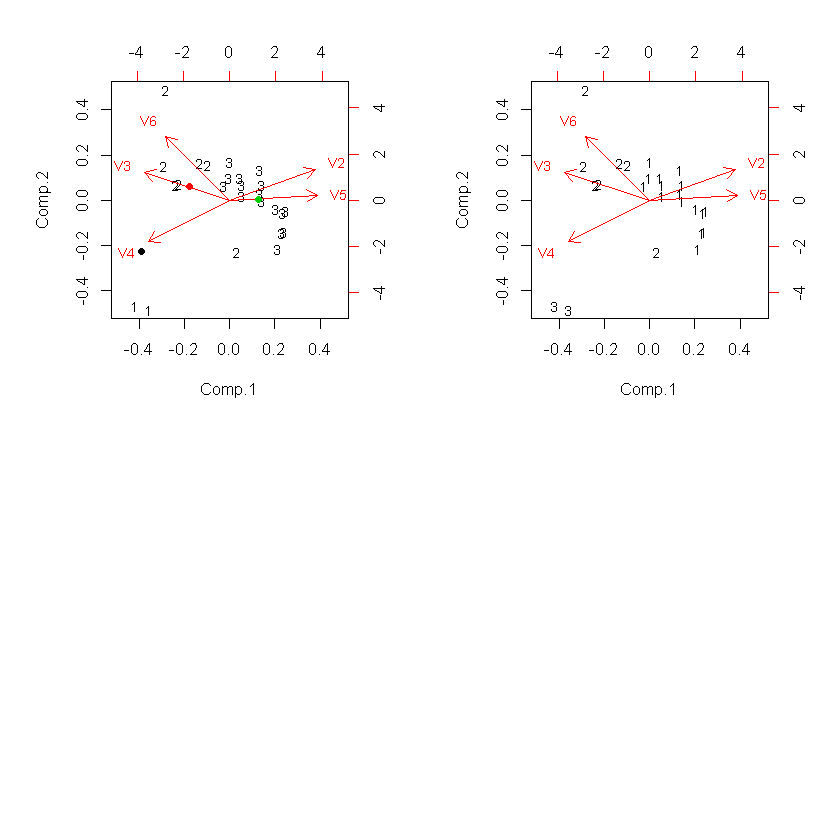

In [23]:
library(cluster)
require(graphics)
datos <-read.table("c:\\milk.dat",row.names=1)
par(mfrow=c(2,2))
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
#J suma cuadrado de las distancias por cada k utilizado
#K-means
J<-rep(0,20)
fin_iter<-20
for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=100,nstart=3)
	J[k]<-cl$tot.withinss
}

plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

#ingresar valor de k0
#data.entry(k0)
k0=3
cl<-kmeans(datos,k0,iter.max=100,nstart=3)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)
#calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)
res2
cl

#agrpamiento jerárquico
res3 <- hclust(dist(datos))
#considerar otros argumentos en hclust y otras distancias #posibles con dist

#grafico de agrupamiento para el caso de 3 grupos
biplot(res, xlabs= cutree(res3,3))


